In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
#%matplotlib inline   # non-interactive (easier for notebook scrolling)
%matplotlib notebook
#plt.style.use(os.path.join(home, 'p', 'matplotlibrc.txt')) # https://matplotlib.org/tutorials/introductory/customizing.html
plt.style.use('https://www.stsci.edu/~dcoe/matplotlibrc.txt') # https://matplotlib.org/tutorials/introductory/customizing.html
mpl_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
import numpy as np
from glob import glob
import os

In [3]:
import astropy.units as u
from astropy.table import Table

In [4]:
def extract_lam(filt):
    lam = int(filt[1:4])/100.
    if filt in 'f435w f475w f606w f814w'.split():
        lam /= 10
    return lam #* u.um

nircam_filters = 'f090w f115w f150w f200w f277w f356w f410m f444w'.split()
nircam_lams = list(map(extract_lam, nircam_filters))
nircam_lams

if 0:
    mario_filters = 'f090w f115w f150w f200w f277w f356w f444w'.split()
    mario_lams = list(map(extract_lam, mario_filters))

    PaolaYoli_filters = 'f090w f115w f200w f277w f356w f410m f444w f105w f110w f125w f140w f160w'.split()
    PaolaYoli_filters = PaolaYoli_filters[:7]  # JWST only
    PaolaYoli_lams = list(map(extract_lam, PaolaYoli_filters))

nircam_lams

[0.9, 1.15, 1.5, 2.0, 2.77, 3.56, 4.1, 4.44]

In [5]:
Larry_fluxes = 28.35, 36.22, 33.53, 31.37, 52.51, 55.64, 55.43, 56.50 # nJy Slack
Larry_fluxerrs = 2.17, 2.21, 1.65, 1.26, 3.23, 2.34, 3.05, 1.71 # nJy
# Aperture corrections
ees = np.array([0.771, 0.7918, 0.8087, 0.8108, 0.8746, 0.8521, 0.849, 0.8469])  # for Swara's PSFs
Larry_fluxes = np.array(Larry_fluxes)
Larry_fluxerrs = np.array(Larry_fluxerrs)
Larry_magerrs = 2.5 * np.log10(1 + Larry_fluxerrs/Larry_fluxes) 
Larry_fluxes /= ees  # from PSF fitting Swara's PSFs
Larry_mags = (Larry_fluxes*u.nJy).to(u.ABmag)

#Jay_mags = np.array([27.700, 27.484, 27.532, 27.505, 28.101, 28.292, 28.426, 28.485]) # Jay Anderson PSF photometry
#Jay_mags[4:] = np.nan
Jay_mags = 27.6913, 27.5015, 27.4920, 27.4923, 27.0928, 27.0790, 26.9460, 27.1300, 
Jay_magerrs = 0.0597,  0.1173,  0.1093,  0.0923,  0.1828,  0.0787,  0.0480,  0.0560, 
    
pipeline_photutils_mags = 27.2085,   26.5823,   26.5587  , 26.7328  , 26.4734  , 26.4766,   26.6522 ,  26.6044
pipeline_aperture_mags = 27.8326 ,  26.8227 ,  26.8316 ,  27.2232  , 26.9563  , 26.8416  , 26.8076 ,  27.0403
grizli_aperture_mags = 27.4009 ,  26.6968 ,  27.1007  , 27.2849,   26.9784,   26.8996  , 26.7985  , 27.0244 

grizli_aperture_fluxes_SE_background = 40.42, 64.50, 53.69, 34.38, 57.12, 65.78, 62.56, 66.42
grizli_aperture_fluxes_NW_background = 45.23, 76.87, 59.23, 43.07, 57.94, 61.06, 63.87, 57.21

Brian_mags = 27.84041185, 27.48601644, 27.54877615, 27.63620914, 27.08427237, 27.02869369, 27.09327916, 27.07539755

PaolaYoli_mags1=[27.76651294, 27.34875861, 27.64274472, 27.23019199, 27.34749725,  27.31559409, 27.10992984, 30.50814151, 27.62956782, 0, 27.17831389,27.55822201]
PaolaYoli_mags2=[27.76651294, 27.34875861, 27.64274472, 27.24017718, 27.36024417, 27.26841943, 27.11902479,  0, 27.6035972,  0, 27.18582778, 27.60142283] 
# filter=[f090,f115,f200,f277,f356,f410f410,f444,f105,f110,f125,f140,f160]

# Earendel PSF photometry clones
grizli_PSF_aperture_mags2 = np.array([[27.43163418, 27.00489298, 27.054602  , 27.22681823, 26.96872855, 26.84875964, 26.85305439, 26.84052249],
       [27.4937582 , 27.05179915, 27.16226802, 27.31583997, 27.0365731 , 26.99862958, 26.86682252, 27.07060048]])
grizli_PSF_aperture_mags = grizli_PSF_aperture_mags2.mean(axis=0)
grizli_PSF_aperture_magerrs = np.abs(grizli_PSF_aperture_mags2[0] - grizli_PSF_aperture_mags2[1])

if 0: # old
    Swara_PSF_mags = 27.779, 27.028, 26.888, 26.869, 26.549, 26.428, 26.615, 26.831

#mario_mags = 26.84, 26.81, 26.70  # F277W, F356W, F444W
mario_mags     = 27.91, 27.50, 27.73, 27.70, 26.91, 26.99, np.nan, 27.00  # missing F410M
mario_mags_PSF = 27.81, 27.38, 27.51, 27.49, 26.99, 26.94, np.nan, 26.81   # missing F410M
# Aperture correction
mario_mags     = np.array(mario_mags)     - 2.5 * np.log10(0.9)
mario_mags_PSF = np.array(mario_mags_PSF) - 2.5 * np.log10(0.9)

In [6]:
Swara_phot = '''#Aperture photometry and PSF photometry results after appropriate aperture corrections for the 10 pixels radius aperture and PSF.
#wavelength aperture_phot_mag aperture_phot_mag_err psf_photometry psf_photometry_err
0.90 27.321 0.618 27.442 0.238
1.15 26.681 0.445 27.025 0.175
1.50 26.960 0.500 27.187 0.183
2.00 27.139 0.542 27.282 0.169
2.77 26.482 0.388 26.848 0.168
3.56 26.448 0.385 26.828 0.136
4.10 26.578 0.419 26.793 0.152
4.44 26.417 0.382 26.799 0.110'''

from astropy.table import Table
Swara_data = Table.read(Swara_phot, format='ascii', header_start=1)
#Swara_data
Swara_aper_mags = Swara_data['aperture_phot_mag']
Swara_aper_magerrs = Swara_data['aperture_phot_mag_err']
Swara_PSF_mags = Swara_data['psf_photometry']
Swara_PSF_magerrs = Swara_data['psf_photometry_err']

Yoli: Hi, I run my interpolation algorithm 50 times for each filter, and I took the final flux of the star as the average of the 50 realisations. I took the std as the flux error due to the interpolation and I added it to the photometric error. My final results are in the attached file. I took 0.3" apertures and corrected them.

In [7]:
PaolaYoli_phot = '''F090W 27.966 0.309 
F115W 27.366 0.189 
F150W 27.537 0.168 
F200W 27.573 0.184 
F277W 26.963 0.134 
F356W 27.114 0.154 
F410M 27.237 0.230 
F444W 26.803 0.156'''

PaolaYoli_data = Table.read(PaolaYoli_phot, format='ascii', names='filter mag magerr'.split())
#PaolaYoli_data

PaolaYoli_mags = PaolaYoli_data['mag']
PaolaYoli_magerrs = PaolaYoli_data['magerr']
PaolaYoli_mags[5:7]    = np.nan  # remove F356W & F410M that include ring and are probably too high in flux
PaolaYoli_magerrs[5:7] = np.nan  # remove F356W & F410M that include ring and are probably too high in flux

In [8]:
Abdurrouf_Swara_PSF_mags = [27.83608492071825, 26.81780536993618, 26.93908004009738, 27.117084986948974,
                26.73506667400857, 26.766238587650633, 26.89181857732043, 26.812158346461572]
Abdurrouf_model_PSF_mags = [27.769600732680715, 26.765765014737084, 26.97908775123613, 27.119030860646404,
                  26.63736758488973, 26.632040162272354, 26.70679130416611, 26.812158346461572]
Abdurrouf_no_PSF_mags = [27.83071085578701, 26.755097422333897, 26.974186391654676, 27.036297650954673,
                    26.59866585454448, 26.591114706115434, 26.694060659909333, 26.812158346461572]

In [9]:
def plot_phot(mags, magerrs=[], color='b', label=None, norm=[], lams=nircam_lams, ls='-', alpha=1):
    global all_mags
    #print()
    #print(mags)
    if len(norm):
        inorm, magnorm = norm
        if inorm > -1:
            mags = np.array(mags) - mags[inorm] + magnorm
            plt.plot(lams[inorm], mags[inorm], 'ko', zorder=10)
        else:
            mags = np.array(mags)
            mags = mags - np.nanmean(mags) + magnorm            
    if 0: #len(magerrs):
        plt.errorbar(lams, mags, magerrs, capsize=5, ls=ls, color=color, label=label, alpha=alpha)
    good = ~np.isnan(mags)
    lams = np.array(lams)
    mags = np.array(mags)
    all_mags.append(mags)
    
    # Latex for table:
    table_tex = ''
    words = label.split(' ')
    #print(words, len(words))
    #if len(words[0]) == 3: # i2d cal 
    #    image = words[0]
    #    image = '{\\tt %s}' % image
    #    words = words[1:]
    #else:
    #    image = 'grizli'
    #    #label = 'grizli ' + label
        
    plt.plot(lams[good], mags[good], 'o-', ls=ls, color=color, label=label, alpha=alpha)

    analyst = words[0]
    image = words[1]
    image = '{\\tt %s}' % image
    method = words[2]
    method = method.replace('_', ' ')
    if len(words) > 3:
        software = words[3]
    else:
        software = ''  #'$\\nodata$'
    color1 = mags[1] - mags[3]  # F115W - F200W
    color2 = mags[3] - mags[4]  # F200W - F277W
    #print(mags, color1, color2)
    #table_tex = '%s & %s & %s & %s & % 4.2f & % 4.2f \\\\' % (analyst, image, method, software, color1, color2)
    
    table_tex = '%s & %s & %s & %s & ' % (analyst, image, method, software)
    for i in range(len(nircam_filters)):
        flux = (mags[i] * u.ABmag).to(u.nJy).value
        if np.isnan(flux):
            table_tex += '\\nodata & '
        else:
            if len(magerrs):
                # magerr = 2.5 * np.log10(1 + fluxerr/flux)
                # 10 ** (0.4 * magerr) = 1 + fluxerr/flux
                fluxerr = flux * (10 ** (0.4 * magerrs[i])- 1)
                table_tex += '$%2d\\pm%2d$ & ' % (flux, fluxerr)
            else:
                table_tex += '%2d & ' % flux
                
            
    table_tex = table_tex[:-2] + '\\\\'

    print(table_tex)

In [10]:
# Format exponential ticks to read as simple numbers unless too big / small
def fmtexp(x, pos):
    if between(1e-4, x, 1e4):
        s = '%g' % x
    else:
        p = int(np.log10(x))
        d = int(np.round(x / 10**p))
        #print d
        s = ''
        if d > 1:
            s += '%d$\\times$' % d
    
        s += '10${\\mathdefault{^{%d}}}$' % p
    return s

# Conversions for second axis
def AB2uJy(mAB):
    m = mAB * u.ABmag
    f = m.to(u.uJy)
    return f.value

def uJy2AB(F_uJy):
    f = F_uJy * u.uJy
    m = f.to(u.ABmag)
    return m.value

def AB2nJy(mAB):
    m = mAB * u.ABmag
    f = m.to(u.nJy)
    return f.value

def nJy2AB(F_nJy):
    f = F_nJy * u.nJy
    m = f.to(u.ABmag)
    return m.value

In [11]:
def plot_all_photometry(phot_norm=[], alpha=1, all_mags_avg_err=[], save_plot=False, PSF_only=False):
    #phot_norm = []  # don't normalize to get overall mean: 27.027; afterwards, redo with:
    #phot_norm = -1, 27.027  # normalize by mean magnitude

    global all_mags
    all_mags = []

    #fig = plt.figure(figsize=(8, 6))
    fig, ax = plt.subplots(1, 1, figsize=(8, 6)) # , sharex=True, sharey=True)

    # PSF fitting
    plot_phot(Brian_mags, [], 'c', 'BW grizli PSF', phot_norm, alpha=alpha)
    plot_phot(Swara_PSF_mags, Swara_PSF_magerrs, 'm', 'SR grizli PSF', phot_norm, alpha=alpha)
    plot_phot(Larry_mags, Larry_magerrs, 'pink', 'LB grizli PSF photutils', phot_norm, alpha=alpha)
    plot_phot(mario_mags_PSF, [], 'g',       'MN grizli PSF imfit',  phot_norm, alpha=alpha)
    plot_phot(Abdurrouf_model_PSF_mags, [], 'r', 'A grizli PSF', phot_norm, alpha=alpha)
    plot_phot(Abdurrouf_Swara_PSF_mags, [], (1,0.5,0.5), 'A grizli WebbPSF', phot_norm, alpha=alpha)
    plot_phot(Jay_mags, Jay_magerrs, 'k', 'JA cal PSF', phot_norm, ls='--', alpha=alpha)

    if not PSF_only:

        # Hybrid
        plot_phot(grizli_PSF_aperture_mags, grizli_PSF_aperture_magerrs, 'y', 'DC grizli PSF-aperture photutils', phot_norm, alpha=alpha)

        # Aperture photometry
        plot_phot(Swara_aper_mags, Swara_aper_magerrs, 'b', 'SR grizli aperture', phot_norm, alpha=alpha)
        plot_phot(PaolaYoli_mags, PaolaYoli_magerrs, 'brown', 'YJ,PD grizli aperture', phot_norm, alpha=alpha)
        plot_phot(mario_mags,     [], (0,0.7,0), 'MN grizli aperture photutils', phot_norm, alpha=alpha)
        plot_phot(grizli_aperture_mags, [], 'C0', 'DC grizli aperture', phot_norm, ls='-', alpha=alpha)
        plot_phot(pipeline_aperture_mags, [], 'C2', 'DC i2d aperture photutils', phot_norm, ls=':', alpha=alpha)
        plot_phot(pipeline_photutils_mags, [], 'orange', 'DC i2d isophotal photuils', phot_norm, ls=':', alpha=alpha)

    if len(phot_norm):
        print('*** FLUXES NORMALIZED TO AVERAGE ***')

    plot_average = len(all_mags_avg_err)
    if plot_average:
        all_mags_avg, all_mags_err = all_mags_avg_err
        plt.errorbar(nircam_lams, all_mags_avg, all_mags_err, color='k', capsize=5, label='average photometry')

    plt.ylim(plt.ylim()[::-1])
    plt.xlabel('Wavelength ($\mu$m)')
    if plot_average:
        plt.ylabel('Normalized Magnitude (AB)')
    else:
        plt.ylabel('Magnitude (AB)')

    plt.legend(loc=4, labelspacing=0)
    plt.xlim(0.5,5)

    secax = ax.secondary_yaxis('right', functions=(AB2nJy, nJy2AB))
    #secax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
    secax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
    secax.yaxis.set_minor_formatter(ticker.FormatStrFormatter("%g"))
    if plot_average:
        secax.set_ylabel('Normalized Flux (nJy)')
    else:
        secax.set_ylabel('Flux (nJy)')

    #plt.title('photometry by committee')
    if save_plot:
        #plt.savefig('photometry_by_committee.png')    
        if type(save_plot) != str:
            save_plot = 'png'
        plt.savefig('photometry_average.' + save_plot)    
    return all_mags

<IPython.core.display.Javascript object>


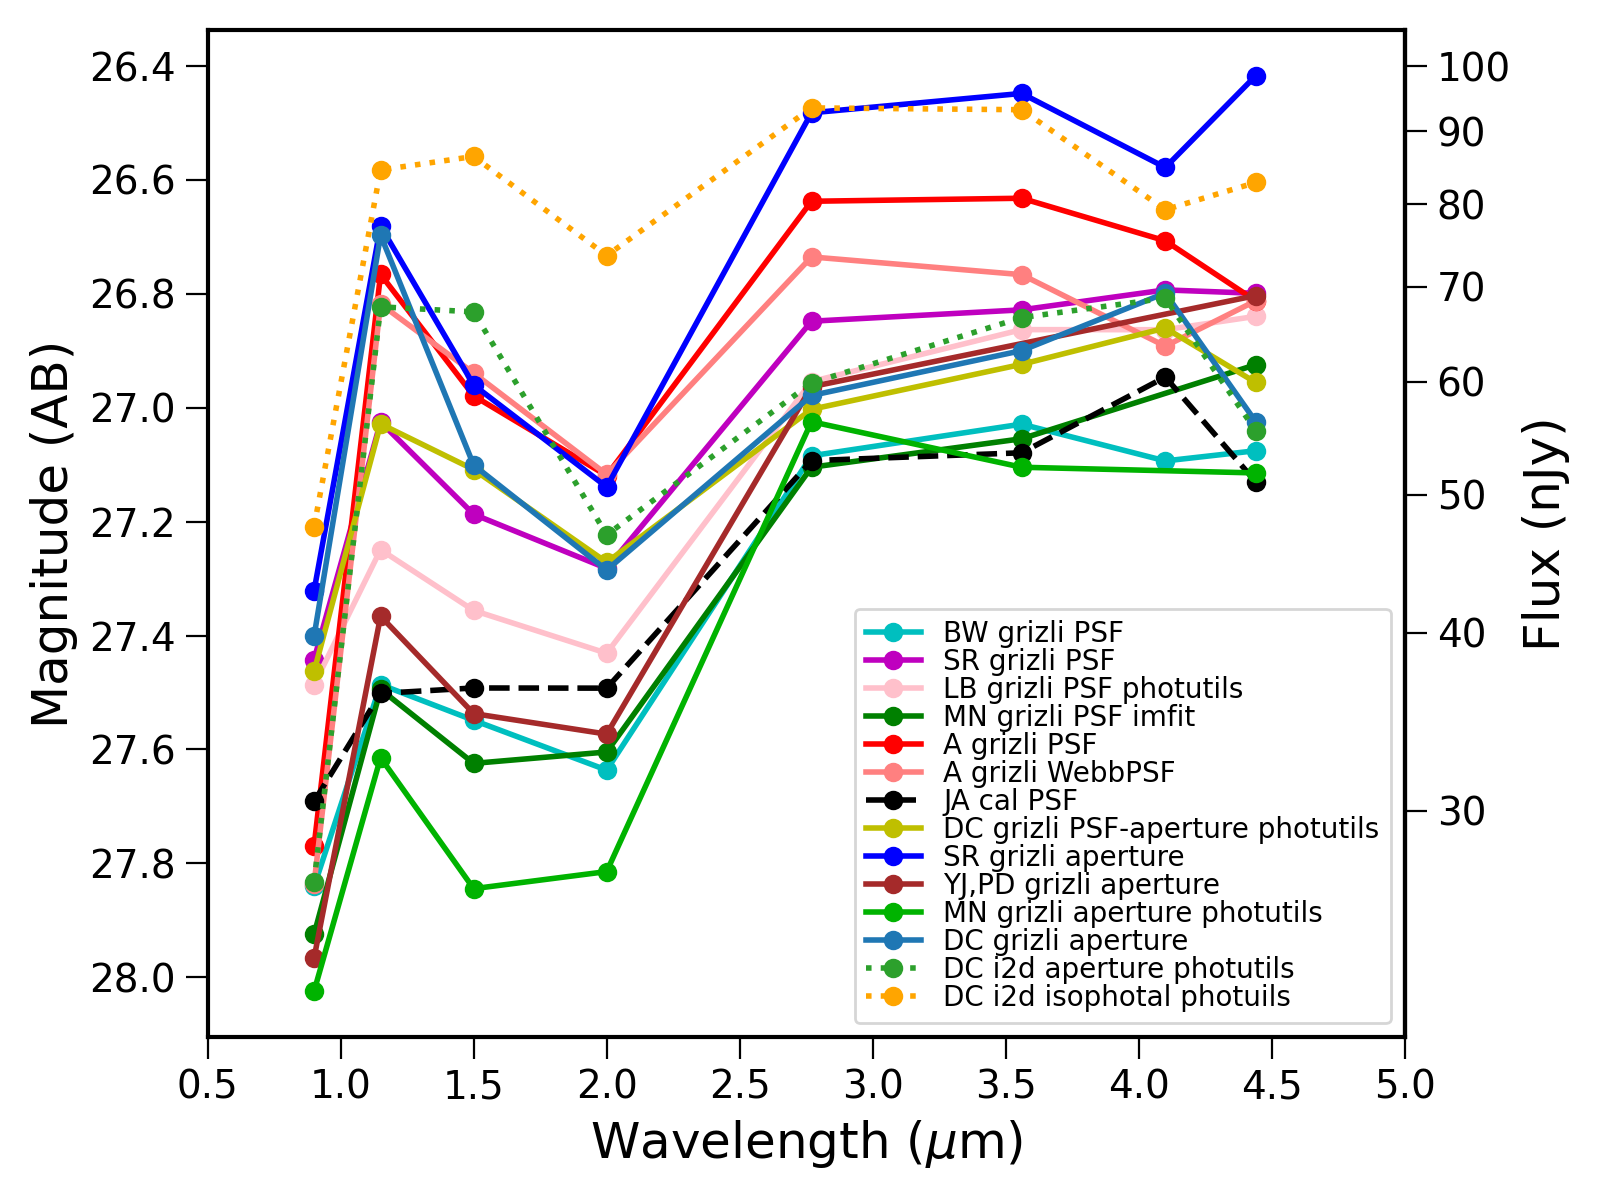

/var/folders/y3/vsjr6j554mnfpgy_m1xrnckm0003tz/T/ipykernel_34615/1779399541.py:32: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(lams[good], mags[good], 'o-', ls=ls, color=color, label=label, alpha=alpha)


BW & {\tt grizli} & PSF &  & 26 & 36 & 34 & 32 & 53 & 56 & 52 & 53 \\
SR & {\tt grizli} & PSF &  & $38\pm 9$ & $56\pm 9$ & $48\pm 8$ & $44\pm 7$ & $66\pm11$ & $67\pm 8$ & $69\pm10$ & $69\pm 7$ \\
LB & {\tt grizli} & PSF & photutils & $36\pm 2$ & $45\pm 2$ & $41\pm 2$ & $38\pm 1$ & $60\pm 3$ & $65\pm 2$ & $65\pm 3$ & $66\pm 2$ \\
MN & {\tt grizli} & PSF & imfit & 24 & 36 & 32 & 32 & 52 & 54 & \nodata & 61 \\
A & {\tt grizli} & PSF &  & 28 & 71 & 58 & 51 & 80 & 80 & 75 & 68 \\
A & {\tt grizli} & WebbPSF &  & 26 & 68 & 60 & 51 & 73 & 71 & 63 & 68 \\
JA & {\tt cal} & PSF &  & $30\pm 1$ & $36\pm 4$ & $36\pm 3$ & $36\pm 3$ & $52\pm 9$ & $53\pm 4$ & $60\pm 2$ & $51\pm 2$ \\
DC & {\tt grizli} & PSF-aperture & photutils & $37\pm 2$ & $56\pm 2$ & $52\pm 5$ & $44\pm 3$ & $57\pm 3$ & $61\pm 9$ & $65\pm 0$ & $59\pm14$ \\
SR & {\tt grizli} & aperture &  & $42\pm32$ & $77\pm39$ & $59\pm34$ & $50\pm32$ & $92\pm39$ & $95\pm40$ & $84\pm39$ & $98\pm41$ \\
YJ,PD & {\tt grizli} & aperture &  & $23\pm 7$ & 

/Users/dcoe/miniconda3/envs/erophot/lib/python3.10/site-packages/astropy/units/function/logarithmic.py:47: RuntimeWarning: divide by zero encountered in log10
  return dex.to(self._function_unit, np.log10(x))


In [12]:
all_mags = plot_all_photometry([], 1)
#plt.savefig('all_photometry.pdf')
plt.savefig('PSF_photometry.png')

In [13]:
all_mags = np.array(all_mags)
all_mags.shape

(14, 8)

In [14]:
np.sort(np.nanmean(all_mags, axis=1))  # average across filters for each method

array([26.6611125 , 26.75325   , 26.92773022, 26.98941719, 27.023025  ,
       27.0255    , 27.0444875 , 27.07658147, 27.1301684 , 27.3031125 ,
       27.34913204, 27.368     , 27.39010801, 27.5058223 ])

In [15]:
#all_mags.mean(axis=0)
np.nanmean(all_mags, axis=0)

array([27.65758103, 27.08079914, 27.21907508, 27.33718854, 26.88114025,
       26.84192409, 26.81727587, 26.88225874])

In [16]:
#all_mags_mean = all_mags.mean()
all_mags_mean = np.nanmean(all_mags)
all_mags_mean

27.09951524723644

In [17]:
all_mags_mean = 27.1  # fix to average of all

<IPython.core.display.Javascript object>


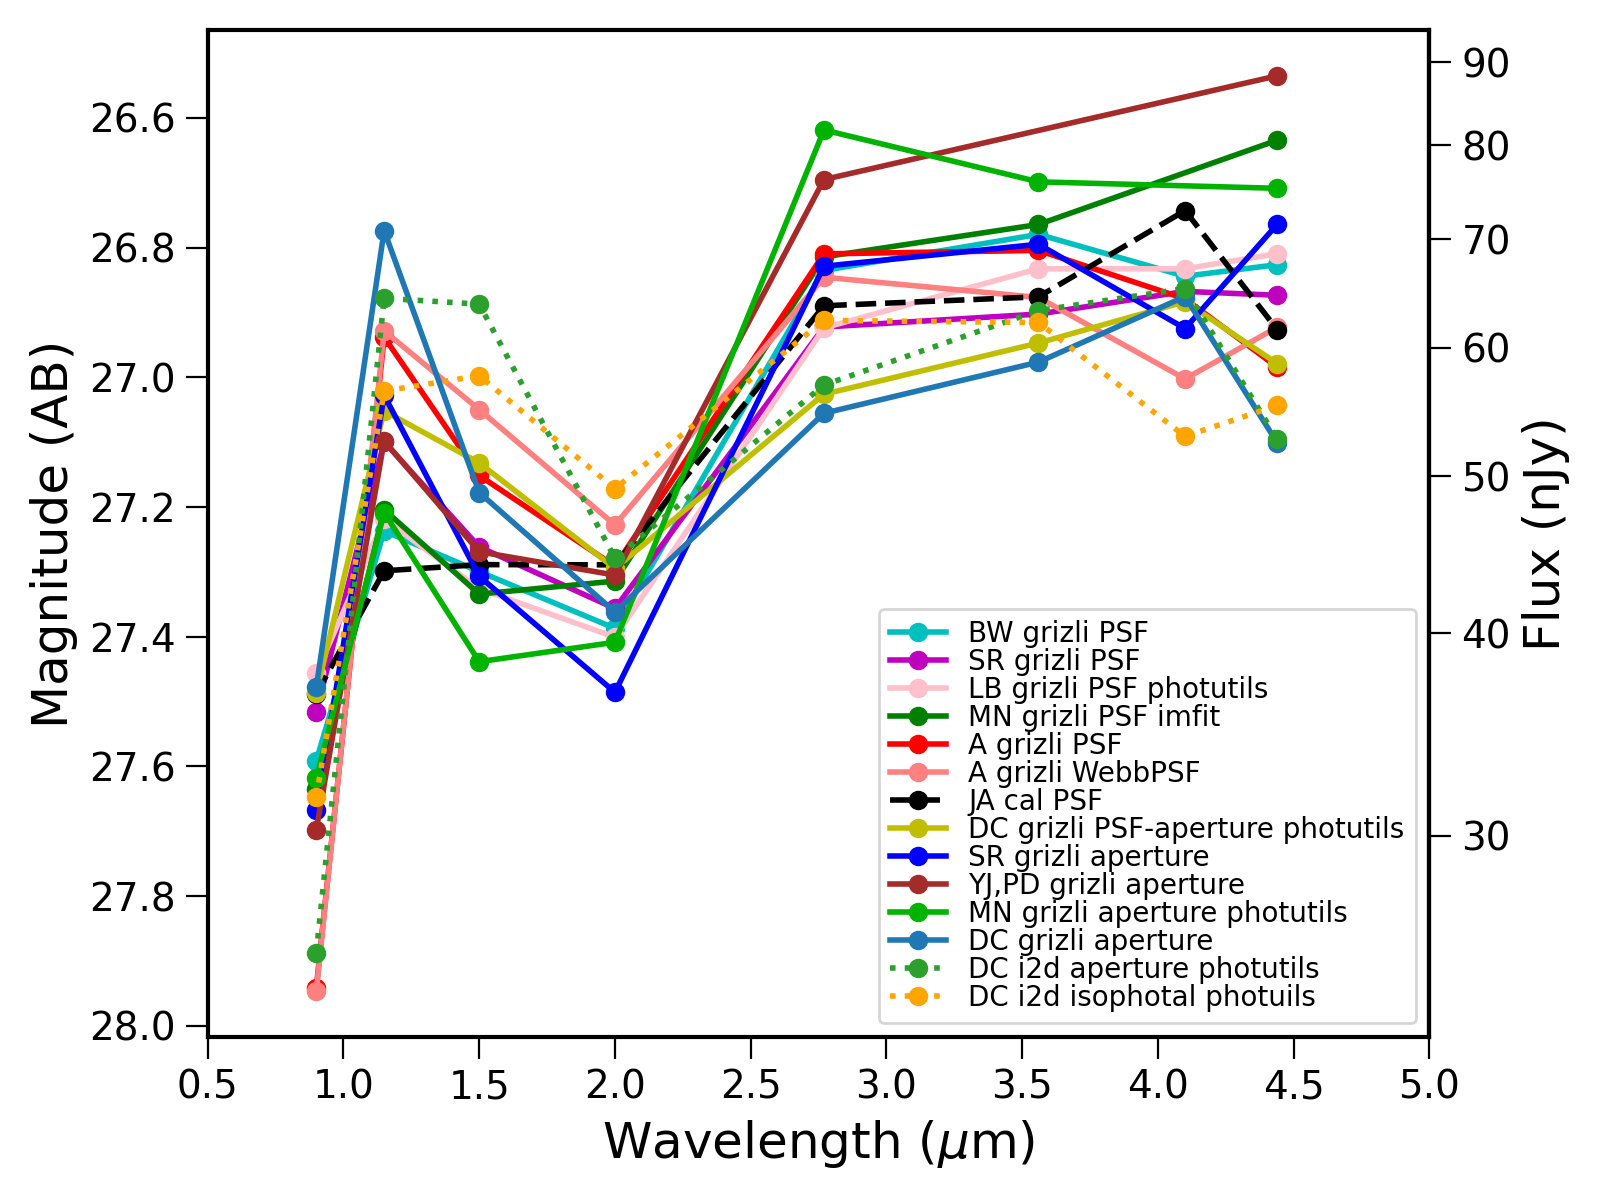

BW & {\tt grizli} & PSF &  & 33 & 46 & 43 & 40 & 66 & 70 & 66 & 67 \\
SR & {\tt grizli} & PSF &  & $35\pm 8$ & $52\pm 9$ & $45\pm 8$ & $41\pm 6$ & $61\pm10$ & $62\pm 8$ & $65\pm 9$ & $64\pm 6$ \\
LB & {\tt grizli} & PSF & photutils & $37\pm 2$ & $47\pm 2$ & $42\pm 2$ & $39\pm 1$ & $61\pm 3$ & $67\pm 2$ & $67\pm 3$ & $68\pm 2$ \\
MN & {\tt grizli} & PSF & imfit & 32 & 47 & 42 & 43 & 68 & 71 & \nodata & 80 \\
A & {\tt grizli} & PSF &  & 24 & 60 & 50 & 44 & 68 & 68 & 64 & 58 \\
A & {\tt grizli} & WebbPSF &  & 24 & 61 & 54 & 46 & 66 & 64 & 57 & 61 \\
JA & {\tt cal} & PSF &  & $36\pm 2$ & $43\pm 4$ & $44\pm 4$ & $44\pm 3$ & $63\pm11$ & $64\pm 4$ & $72\pm 3$ & $61\pm 3$ \\
DC & {\tt grizli} & PSF-aperture & photutils & $36\pm 2$ & $54\pm 2$ & $50\pm 5$ & $43\pm 3$ & $56\pm 3$ & $60\pm 8$ & $64\pm 0$ & $58\pm13$ \\
SR & {\tt grizli} & aperture &  & $31\pm23$ & $56\pm28$ & $43\pm25$ & $36\pm23$ & $67\pm28$ & $69\pm29$ & $61\pm29$ & $71\pm30$ \\
YJ,PD & {\tt grizli} & aperture &  & $30\pm 9$ & 

/var/folders/y3/vsjr6j554mnfpgy_m1xrnckm0003tz/T/ipykernel_34615/1779399541.py:32: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(lams[good], mags[good], 'o-', ls=ls, color=color, label=label, alpha=alpha)


In [18]:
all_mags = plot_all_photometry([-1, all_mags_mean], 1)

In [19]:
all_mags = np.array(all_mags)
all_mags.shape

(14, 8)

In [20]:
all_mags_avg = np.nanmean(all_mags, axis=0)
all_mags_err = np.nanstd(all_mags, axis=0)

In [21]:
s = 'mags = '
for mag in all_mags_avg:
    s += '%6.3f, ' % mag
print(s[:-2])

mags = 27.647, 27.070, 27.209, 27.327, 26.871, 26.851, 26.892, 26.872


In [22]:
s = 'magerrs = '
for mag in all_mags_err:
    s += '%6.3f, ' % mag
print(s[:-2])

magerrs =  0.164,  0.148,  0.146,  0.077,  0.117,  0.077,  0.087,  0.164


<IPython.core.display.Javascript object>


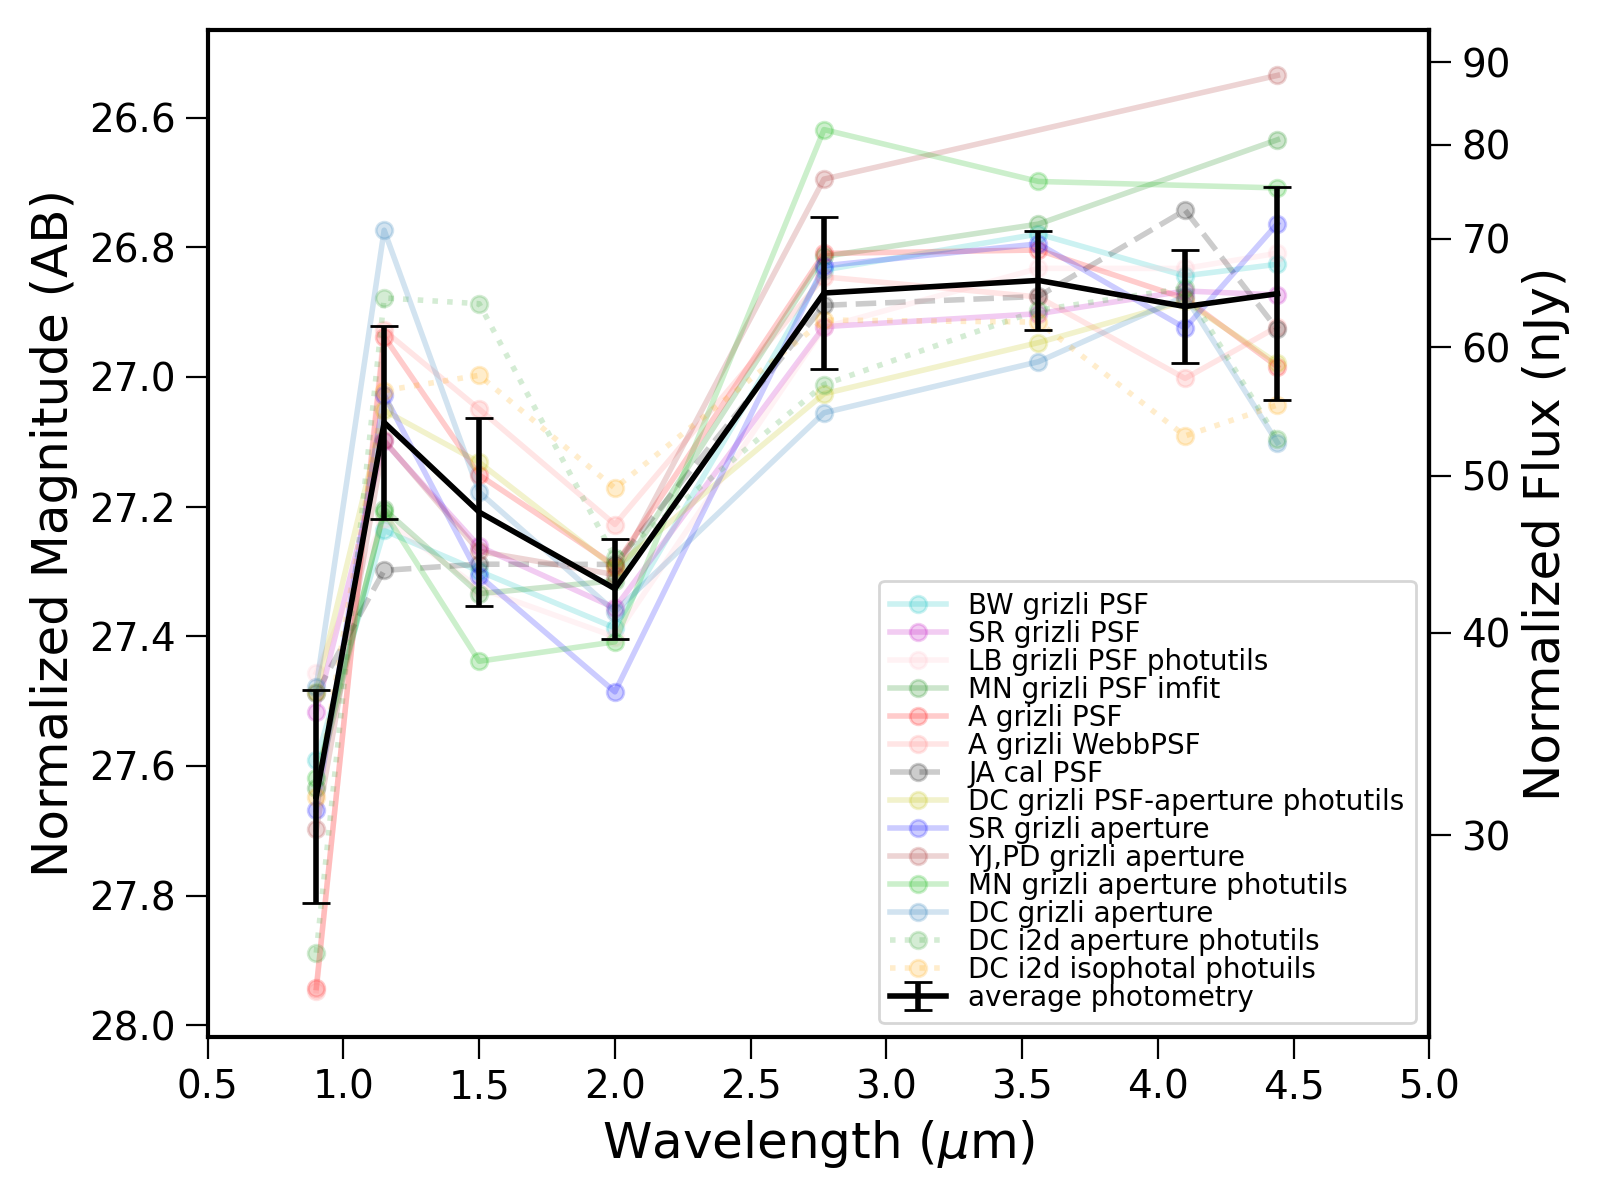

/var/folders/y3/vsjr6j554mnfpgy_m1xrnckm0003tz/T/ipykernel_34615/1779399541.py:32: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(lams[good], mags[good], 'o-', ls=ls, color=color, label=label, alpha=alpha)


BW & {\tt grizli} & PSF &  & 33 & 46 & 43 & 40 & 66 & 70 & 66 & 67 \\
SR & {\tt grizli} & PSF &  & $35\pm 8$ & $52\pm 9$ & $45\pm 8$ & $41\pm 6$ & $61\pm10$ & $62\pm 8$ & $65\pm 9$ & $64\pm 6$ \\
LB & {\tt grizli} & PSF & photutils & $37\pm 2$ & $47\pm 2$ & $42\pm 2$ & $39\pm 1$ & $61\pm 3$ & $67\pm 2$ & $67\pm 3$ & $68\pm 2$ \\
MN & {\tt grizli} & PSF & imfit & 32 & 47 & 42 & 43 & 68 & 71 & \nodata & 80 \\
A & {\tt grizli} & PSF &  & 24 & 60 & 50 & 44 & 68 & 68 & 64 & 58 \\
A & {\tt grizli} & WebbPSF &  & 24 & 61 & 54 & 46 & 66 & 64 & 57 & 61 \\
JA & {\tt cal} & PSF &  & $36\pm 2$ & $43\pm 4$ & $44\pm 4$ & $44\pm 3$ & $63\pm11$ & $64\pm 4$ & $72\pm 3$ & $61\pm 3$ \\
DC & {\tt grizli} & PSF-aperture & photutils & $36\pm 2$ & $54\pm 2$ & $50\pm 5$ & $43\pm 3$ & $56\pm 3$ & $60\pm 8$ & $64\pm 0$ & $58\pm13$ \\
SR & {\tt grizli} & aperture &  & $31\pm23$ & $56\pm28$ & $43\pm25$ & $36\pm23$ & $67\pm28$ & $69\pm29$ & $61\pm29$ & $71\pm30$ \\
YJ,PD & {\tt grizli} & aperture &  & $30\pm 9$ & 

In [23]:
all_mags = plot_all_photometry([-1, all_mags_mean], 0.2, [all_mags_avg, all_mags_err], save_plot=False)
#all_mags = plot_all_photometry([-1, all_mags_mean], 0.2, [all_mags_avg, all_mags_err], save_plot='pdf')
plt.ylim(28.018, 26.465)
plt.savefig('normalized_PSF_photometry.png')